<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/Two_dimensionalarrayandgradientproblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x (first 5): [-50.  -49.9 -49.8 -49.7 -49.6]
y (first 5): [-599.  -597.8 -596.6 -595.4 -594.2]
Length of x: 1001
Length of y: 1001
[[ -50.  -599. ]
 [ -49.9 -597.8]
 [ -49.8 -596.6]
 [ -49.7 -595.4]
 [ -49.6 -594.2]]
Shape of array_xy: (1001, 2)
Gradient (first 5): [12. 12. 12. 12. 12.]
Length of gradient: 1000


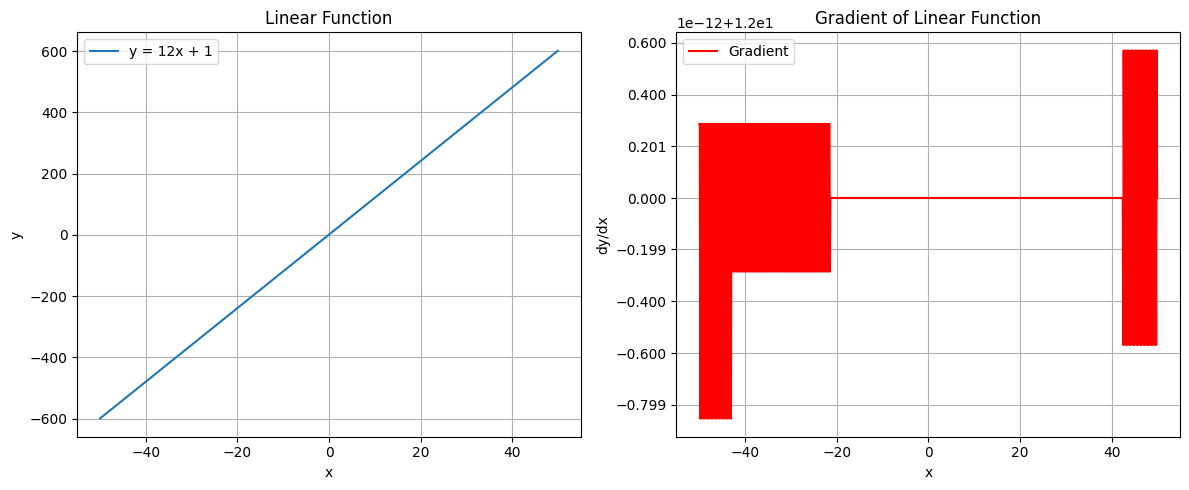

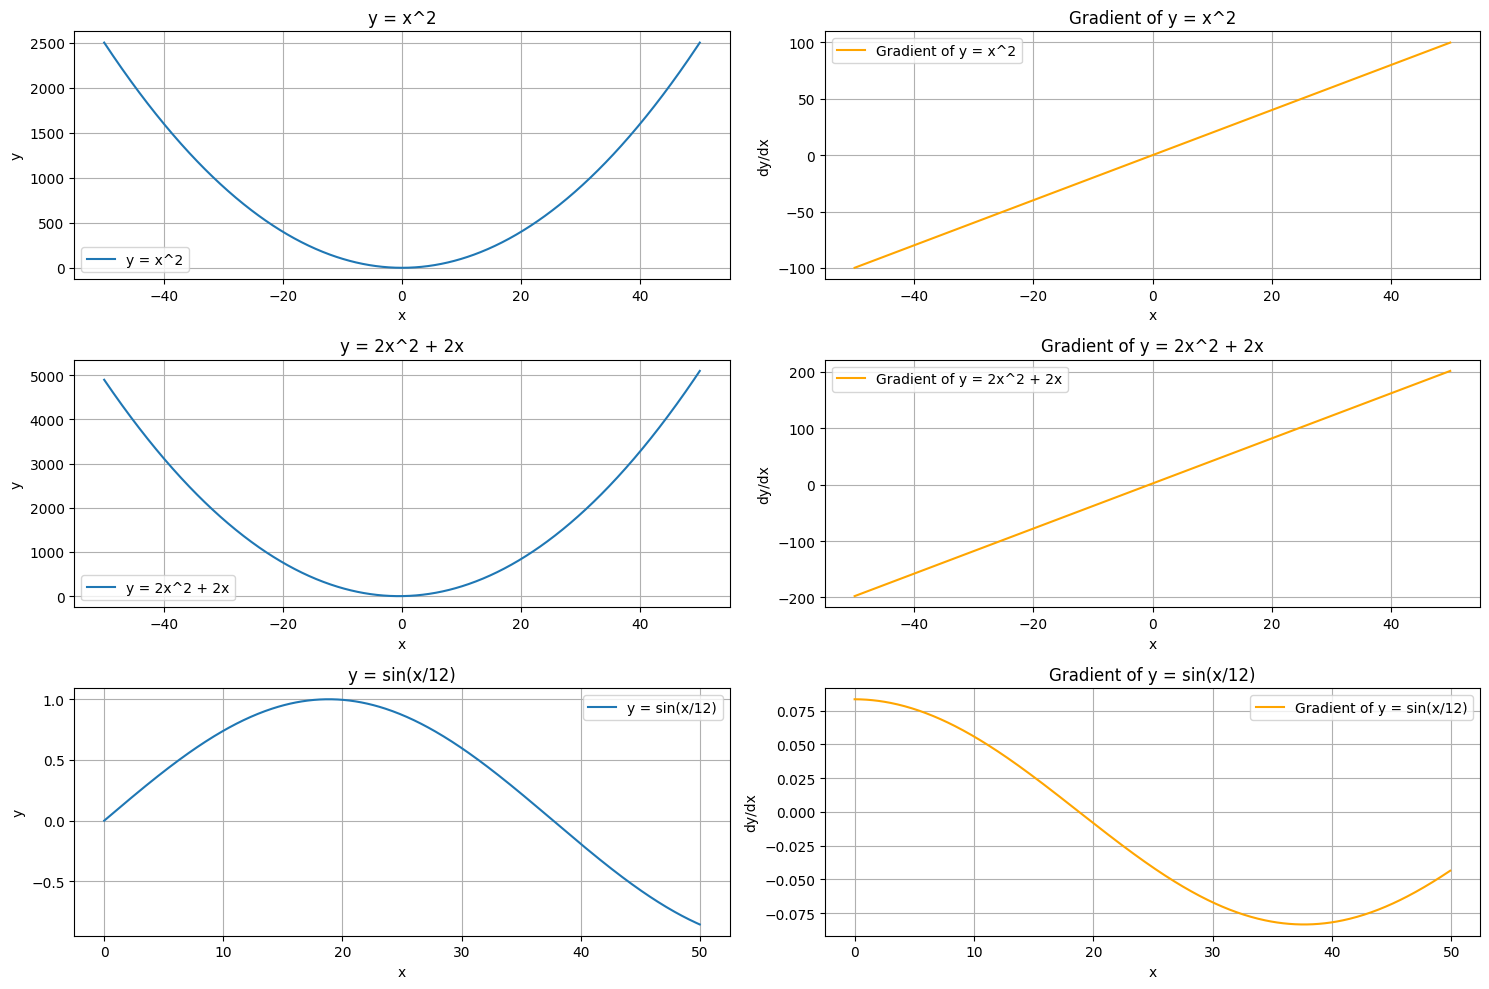


Function: y = x^2
Minimum y: 5.048709793414476e-25 at x = 7.105427357601002e-13
Gradient before min: -0.09999999999858034
Gradient after min: 0.1000000000014225

Function: y = 2x^2 + 2x
Minimum y: -0.5 at x = -0.49999999999929656
Gradient before min: -0.1999999999971896
Gradient after min: 0.20000000000281676

Function: y = sin(x/12)
Minimum y: -0.85475260723884 at x = 50.0
Gradient before min: -0.04354925555293513
Gradient after min: N/A


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Linear function
x = np.arange(-50, 50.1, 0.1)
y = 12 * x + 1
print("x (first 5):", x[:5])
print("y (first 5):", y[:5])
print("Length of x:", len(x))
print("Length of y:", len(y))

# Problem 2: Array combination
array_xy = np.stack((x, y), axis=1)
print(array_xy[:5])
print("Shape of array_xy:", array_xy.shape)

# Problem 3: Find the gradient
gradient = np.diff(y) / np.diff(x)
print("Gradient (first 5):", gradient[:5])
print("Length of gradient:", len(gradient))

# Problem 4: Draw a graph
plt.figure(figsize=(12, 5))

# Plotting the linear function
plt.subplot(1, 2, 1)
plt.plot(x, y, label='y = 12x + 1')
plt.title('Linear Function')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# Plotting the gradient
plt.subplot(1, 2, 2)
plt.plot(x[:-1], gradient, color='red', label='Gradient')
plt.title('Gradient of Linear Function')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Problem 5: Python functionalization
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    Calculate the gradient using the amount of change.

    Parameters
    ----------
    function: function
    The function you want to find, the one that returns the ndarray of y when you put the ndarray of x.
    x_range: tuple
    Specify the range in the same way as the argument of np.arange().

    Returns
    -------
    array_xy: ndarray, shape(n, 2)
    A combination of x and y.n depends on x_range.
    gradient: ndarray, shape(n - 1,)
    Function gradient.One factor is reduced to make a difference.
    """
    x = np.arange(*x_range)
    y = function(x)
    array_xy = np.stack((x, y), axis=1)
    gradient = np.diff(y) / np.diff(x)
    return array_xy, gradient

# Defining functions
def function1(x):  # y = x^2
    return x ** 2

def function2(x):  # y = 2x^2 + 2x
    return 2 * x ** 2 + 2 * x

def function3(x):  # y = sin(x/12)
    return np.sin(x / 12)

# Computing gradients
array1, grad1 = compute_gradient(function1)
array2, grad2 = compute_gradient(function2)
array3, grad3 = compute_gradient(function3, x_range=(0, 50.1, 0.1))

# Plotting all three functions and gradients
functions = [(array1, grad1, 'y = x^2'),
             (array2, grad2, 'y = 2x^2 + 2x'),
             (array3, grad3, 'y = sin(x/12)')]

plt.figure(figsize=(15, 10))

for i, (arr, grad, label) in enumerate(functions, 1):
    plt.subplot(3, 2, 2*i-1)
    plt.plot(arr[:, 0], arr[:, 1], label=label)
    plt.title(label)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 2, 2*i)
    plt.plot(arr[:-1, 0], grad, label=f"Gradient of {label}", color='orange')
    plt.title(f"Gradient of {label}")
    plt.xlabel('x')
    plt.ylabel('dy/dx')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

# Problem 6: Find the minimum value
def report_min_info(array_xy, gradient, func_name):
    y_values = array_xy[:, 1]
    x_values = array_xy[:, 0]
    min_index = y_values.argmin()
    min_y = y_values[min_index]
    min_x = x_values[min_index]

    grad_before = gradient[min_index - 1] if min_index > 0 else 'N/A'
    grad_after = gradient[min_index] if min_index < len(gradient) else 'N/A'

    print(f"\nFunction: {func_name}")
    print(f"Minimum y: {min_y} at x = {min_x}")
    print(f"Gradient before min: {grad_before}")
    print(f"Gradient after min: {grad_after}")

# Report for all three functions
report_min_info(array1, grad1, "y = x^2")
report_min_info(array2, grad2, "y = 2x^2 + 2x")
report_min_info(array3, grad3, "y = sin(x/12)")
